# INSAID Hiring Assignment

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    


- There is comments present in almost every block of code and also various Markdown will also help the grader.
- In the end i have used 4 ML models for the churn prediction.
- Everything is explained there and within.
- Also evaluation of those models has been done using Factors like **F1 score, jaccard similarity score and log-loss**.

## 1. Data Understanding And Manipulation

### Importing Libraries. 

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [106]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Importing the data

In [107]:
data=pd.read_csv(r'Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### let's see the columns in the dataset.

In [108]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

#### Finding unique values inside every column.

In [109]:
for col in data.columns:
    print(col,':',len(data[col].unique()),'labels')

customerID : 7043 labels
gender : 2 labels
SeniorCitizen : 2 labels
Partner : 2 labels
Dependents : 2 labels
tenure : 73 labels
PhoneService : 2 labels
MultipleLines : 3 labels
InternetService : 3 labels
OnlineSecurity : 3 labels
OnlineBackup : 3 labels
DeviceProtection : 3 labels
TechSupport : 3 labels
StreamingTV : 3 labels
StreamingMovies : 3 labels
Contract : 3 labels
PaperlessBilling : 2 labels
PaymentMethod : 4 labels
MonthlyCharges : 1585 labels
TotalCharges : 6531 labels
Churn : 2 labels


### These all columns are 2 Categorical columns.

In [110]:
print(data['gender'].value_counts())
print(data['Partner'].value_counts())
print(data['PhoneService'].value_counts())
print(data['Dependents'].value_counts())
print(data['PaperlessBilling'].value_counts())
print('_____________________________________')


Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
_____________________________________


### Listed Columns has three Categorical Values

In [111]:
print(data['OnlineSecurity'].value_counts())
print(data['DeviceProtection'].value_counts())
print(data['StreamingMovies'].value_counts())
print(data['StreamingTV'].value_counts())
print(data['TechSupport'].value_counts())
print(data['OnlineBackup'].value_counts())
# print(data['Contract'].value_counts())
# print(data['MultipleLines'].value_counts())
print(data['InternetService'].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


#### If you see closely 
- There are these same **1526** person redundant in every column which do **not have the Internet service**.
- Also 7 columns in this dataset have same 1526 values.(No internet service)


In [112]:
print(data['Contract'].value_counts())
print(data['MultipleLines'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


In [113]:
## Only Column with 4 categoriacal feature.

print(data['PaymentMethod'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


### Label Encoding: 

In [114]:
# 1. Gender
## Female = 1 and Male = 0.
data['gender'].replace(to_replace=['Male','Female'],value=[0,1],inplace=True)

# 2. Partner
## Yes = 1 and No = 0
data['Partner'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

# 3. Phone Service
## Yes = 1 and No = 0
data['PhoneService'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

# 4. Dependents
## Yes = 1 and No = 0
data['Dependents'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

# 5. PaperLess Billing
## Yes = 1 and No = 0

data['PaperlessBilling'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

# ## 6. Churn
# ## Yes=1 and No = 0

# data['Churn'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes


- **Data Preparation**

In [115]:
## Checking on the Null values.

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [116]:
# Let's try to find some Outliers or Nan values.
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000


In [117]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Approach for 3 categorical valued Features.

- Will do one hot encoding for single column and label encoding for others.

- Yes = 1 and everything else is 0.

In [118]:
#dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0

dum=data[['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]
dum.head()


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,No,No,No
1,DSL,Yes,No,Yes,No,No,No
2,DSL,Yes,Yes,No,No,No,No
3,DSL,Yes,No,Yes,Yes,No,No
4,Fiber optic,No,No,No,No,No,No


In [119]:
dum.loc[dum['InternetService']== 'No']

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
11,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
16,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
21,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
22,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
33,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
42,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
58,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
68,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
71,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
73,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


### Insights:

- Look closely: These 1526 values are exactly the same in 7 columns.
- This means that one No Internet Service feature in the dataset is enough for all these 7 columns.
- No need to do one hot encoding for all of them. 

In [120]:
# One Hot Encoding of column Internet Service:

d1=pd.get_dummies(data['InternetService'])
d1.head()

,DSL,Fiber optic,No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [121]:
#df.rename(columns={"A": "a", "B": "c"})
d1=d1.rename(columns={'No':'No internet service'})
d1.head()

,DSL,Fiber optic,No internet service
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


### Data Manipulation

In [122]:
# Will concatenate the d1 dataframe with original data
# Axis=1 will concate them column wise.
# sort = True will sort them also to remove the inwanted warning.

X=pd.concat([data,d1],axis=1,sort=True)
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No internet service
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,No,1,0,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,1,0,0
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes,0,1,0


- Clearly there is no need of InternetService column now.


In [123]:
X.drop(['InternetService'],axis=1,inplace=True)
X.columns
## This will drop the InternetService feature from the dataframe.

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'DSL', 'Fiber optic', 'No internet service'], dtype='object')

#### Label Encoding of other features. 


- OnlineSecurity 

- OnlineBackup 

- DeviceProtection 

- TechSupport 

- StreamingTV 

- StreamingMovies

In [124]:
X['OnlineBackup'].replace(to_replace=['Yes','No','No internet service'],value=[1,0,0],inplace=True)
X['OnlineSecurity'].replace(to_replace=['Yes','No','No internet service'],value=[1,0,0],inplace=True)
X['DeviceProtection'].replace(to_replace=['Yes','No','No internet service'],value=[1,0,0],inplace=True)
X['TechSupport'].replace(to_replace=['Yes','No','No internet service'],value=[1,0,0],inplace=True)
X['StreamingMovies'].replace(to_replace=['Yes','No','No internet service'],value=[1,0,0],inplace=True)
X['StreamingTV'].replace(to_replace=['Yes','No','No internet service'],value=[1,0,0],inplace=True)
X.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No internet service
0,7590-VHVEG,1,0,1,0,1,0,No phone service,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,0,0,0,0,34,1,No,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,No,1,0,0
2,3668-QPYBK,0,0,0,0,2,1,No,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,1,0,0
3,7795-CFOCW,0,0,0,0,45,0,No phone service,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,9237-HQITU,1,0,0,0,2,1,No,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,0,1,0
5,9305-CDSKC,1,0,0,0,8,1,Yes,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,Yes,0,1,0
6,1452-KIOVK,0,0,0,1,22,1,Yes,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,No,0,1,0
7,6713-OKOMC,1,0,0,0,10,0,No phone service,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,No,1,0,0
8,7892-POOKP,1,0,1,0,28,1,Yes,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,Yes,0,1,0
9,6388-TABGU,0,0,0,1,62,1,No,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,No,1,0,0


#### Columns left for Encoding:

- Contract
- Payment Method
- Multiple Lines

In [125]:
x1=pd.get_dummies(X['Contract'])
x2=pd.get_dummies(X['PaymentMethod'])
x3=pd.get_dummies(X['MultipleLines'])



In [126]:
X.drop(['Contract','PaymentMethod','MultipleLines'],axis=1,inplace=True)
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No internet service
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,No,1,0,0
1,5575-GNVDE,0,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.5,No,1,0,0
2,3668-QPYBK,0,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,Yes,1,0,0
3,7795-CFOCW,0,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,No,1,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,Yes,0,1,0


In [127]:
X=pd.concat([X,x1,x2,x3],axis=1,sort=True)
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No internet service,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,No,No phone service,Yes
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,No,1,0,0,1,0,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.5,No,1,0,0,0,1,0,0,0,0,1,1,0,0
2,3668-QPYBK,0,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,Yes,1,0,0,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,0,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,No,1,0,0,0,1,0,1,0,0,0,0,1,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,Yes,0,1,0,1,0,0,0,0,1,0,1,0,0


In [128]:
X.rename(columns={'Yes':'MultipleLines','No':'No_MultipleLines'},inplace=True)
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No internet service,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,No_MultipleLines,No phone service,MultipleLines
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,No,1,0,0,1,0,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.5,No,1,0,0,0,1,0,0,0,0,1,1,0,0
2,3668-QPYBK,0,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,Yes,1,0,0,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,0,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,No,1,0,0,0,1,0,1,0,0,0,0,1,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,Yes,0,1,0,1,0,0,0,0,1,0,1,0,0


#### Now the data is ready for Train-test Split and further will make the model.

In [129]:
y=data['Churn']
y.shape

(7043,)

In [130]:
X.drop(['Churn','customerID'],axis=1,inplace=True)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,DSL,Fiber optic,No internet service,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,No_MultipleLines,No phone service,MultipleLines
0,1,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,1,0,0,1,0,0,0,0,1,0,0,1,0
1,0,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.5,1,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1,0,0,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,1,0,0,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,0,1,0,1,0,0,0,0,1,0,1,0,0


In [131]:
X.dtypes

gender                         int64
SeniorCitizen                  int64
Partner                        int64
Dependents                     int64
tenure                         int64
PhoneService                   int64
OnlineSecurity                 int64
OnlineBackup                   int64
DeviceProtection               int64
TechSupport                    int64
StreamingTV                    int64
StreamingMovies                int64
PaperlessBilling               int64
MonthlyCharges               float64
TotalCharges                  object
DSL                            uint8
Fiber optic                    uint8
No internet service            uint8
Month-to-month                 uint8
One year                       uint8
Two year                       uint8
Bank transfer (automatic)      uint8
Credit card (automatic)        uint8
Electronic check               uint8
Mailed check                   uint8
No_MultipleLines               uint8
No phone service               uint8
M

In [132]:
X['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
5         820.5
6        1949.4
7         301.9
8       3046.05
9       3487.95
10       587.45
11        326.8
12       5681.1
13       5036.3
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19       1862.9
20        39.65
21       202.25
22        20.15
23       3505.1
24       2970.3
25       1530.6
26      4749.15
27         30.2
28      6369.45
29       1093.1
30      6766.95
31       181.65
32      1874.45
33         20.2
34        45.25
35       7251.7
36        316.9
37       3548.3
38      3549.25
39       1105.4
40        475.7
41      4872.35
42       418.25
43      4861.45
44       981.45
45       3906.7
46           97
47       144.15
48       4217.8
49       4254.1
50      3838.75
51       1426.4
52      1752.65
53        633.3
54      4456.35
55      1752.55
56       6311.2
57      7076.35
58        894.3
59       7853.7
60       4707.1
61       5450.7
62      

In [133]:
#df['purchase'].astype(str).astype(int)
X['TotalCharge']= str(X['TotalCharges'])

In [134]:
X.drop(['TotalCharge','TotalCharges'],axis=1,inplace=True)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,DSL,Fiber optic,No internet service,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,No_MultipleLines,No phone service,MultipleLines
0,1,0,1,0,1,0,0,1,0,0,0,0,1,29.85,1,0,0,1,0,0,0,0,1,0,0,1,0
1,0,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,2,1,1,1,0,0,0,0,1,53.85,1,0,0,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1,0,0,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,0,0,1,70.70,0,1,0,1,0,0,0,0,1,0,1,0,0


## 2. Data Visualization

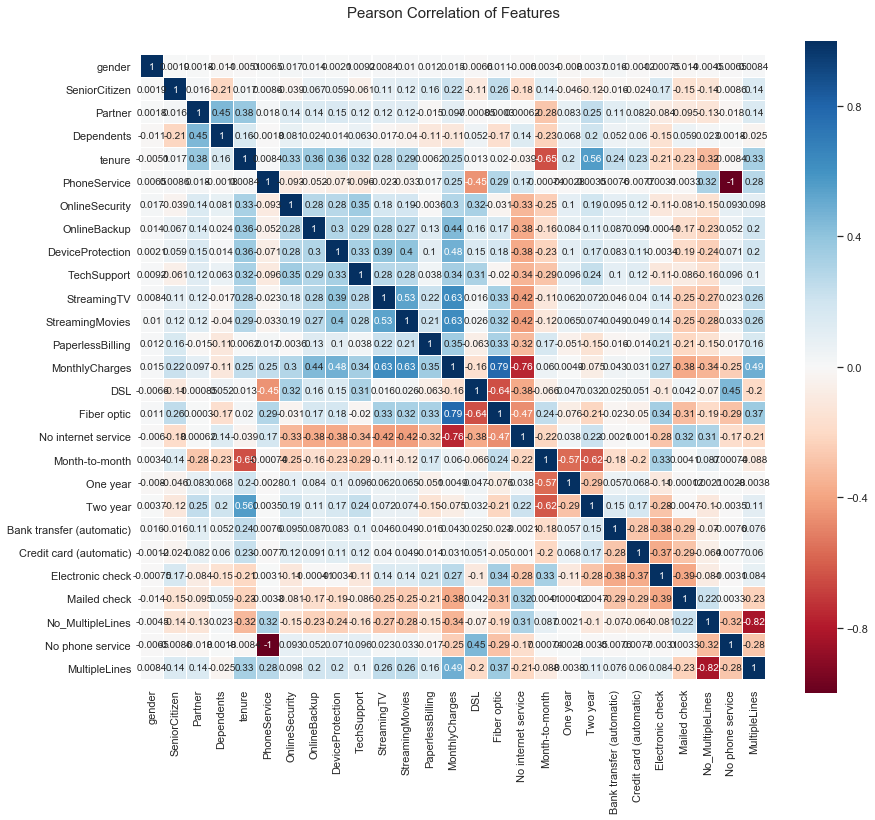

In [135]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

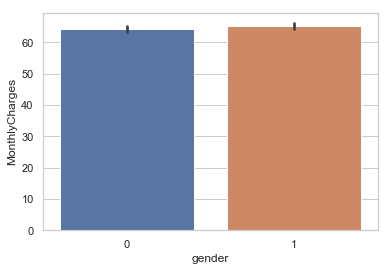

In [136]:
sns.barplot(x='gender',y='MonthlyCharges',data=data)

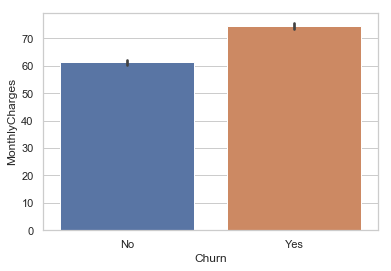

In [137]:
sns.barplot(x='Churn',y='MonthlyCharges',data=data)

- This plot shows quite important relationship between Churn and MonthlyCharges.
- Clearly Customer with **high MonthlyCharges has a high chance of Churning** rather than those who have less charges.

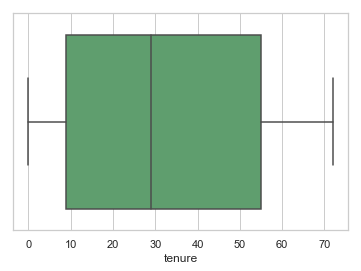

In [138]:
sns.set(style='whitegrid')
sns.boxplot(data['tenure'],color='g')

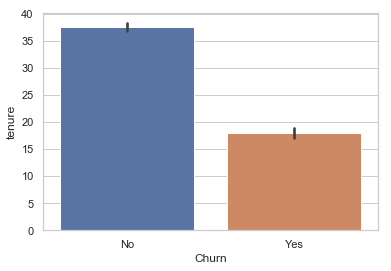

In [139]:
sns.barplot(x='Churn',y='tenure',data=data)

- This plot shows quite important relationship between tenure and churn.
- Clearly Customer with **less tenure has a high chance of Churning** rather than those who have high tenure.

Text(0.5, 1.0, 'CORRELATION')

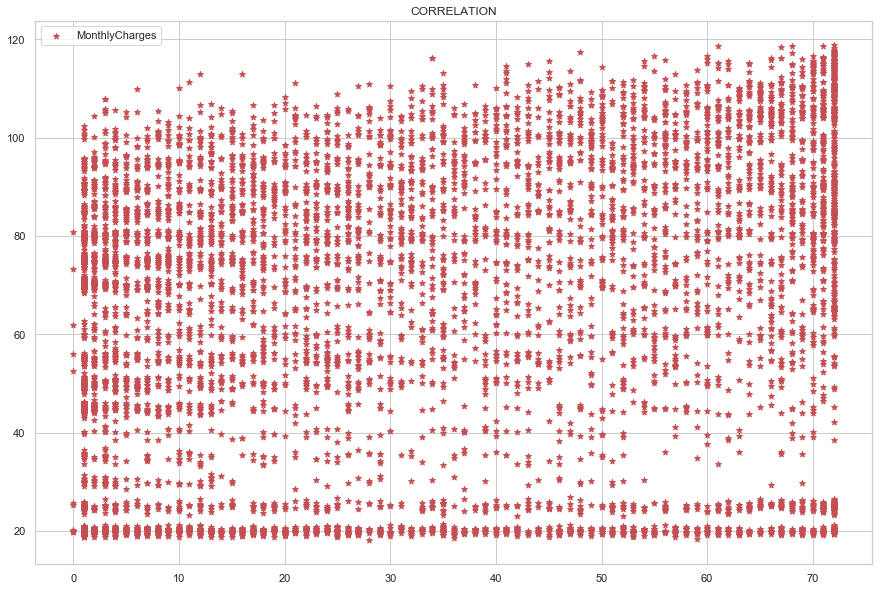

In [140]:

plt.figure(figsize=(15,10))
plt.grid(True)
plt.scatter(data['tenure'],data['MonthlyCharges'],color='r',marker='*')
#plt.plot(data['Discharge Pressure (psig)'], label='Discharge')
plt.legend(loc=2)
#plt.xlabel('Churn')
#plt.ylabel('tenure')
plt.title('CORRELATION')

In [141]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'DSL', 'Fiber optic', 'No internet service', 'Month-to-month', 'One year', 'Two year', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check', 'No_MultipleLines', 'No phone service', 'MultipleLines'], dtype='object')

In [142]:

## Creating a small dummy dataset for making understandable Pairplot

x=X[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure','DeviceProtection',
        'StreamingTV', 'StreamingMovies', 
       'MonthlyCharges']]
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,DeviceProtection,StreamingTV,StreamingMovies,MonthlyCharges
0,1,0,1,0,1,0,0,0,29.85
1,0,0,0,0,34,1,0,0,56.95
2,0,0,0,0,2,0,0,0,53.85
3,0,0,0,0,45,1,0,0,42.30
4,1,0,0,0,2,0,0,0,70.70


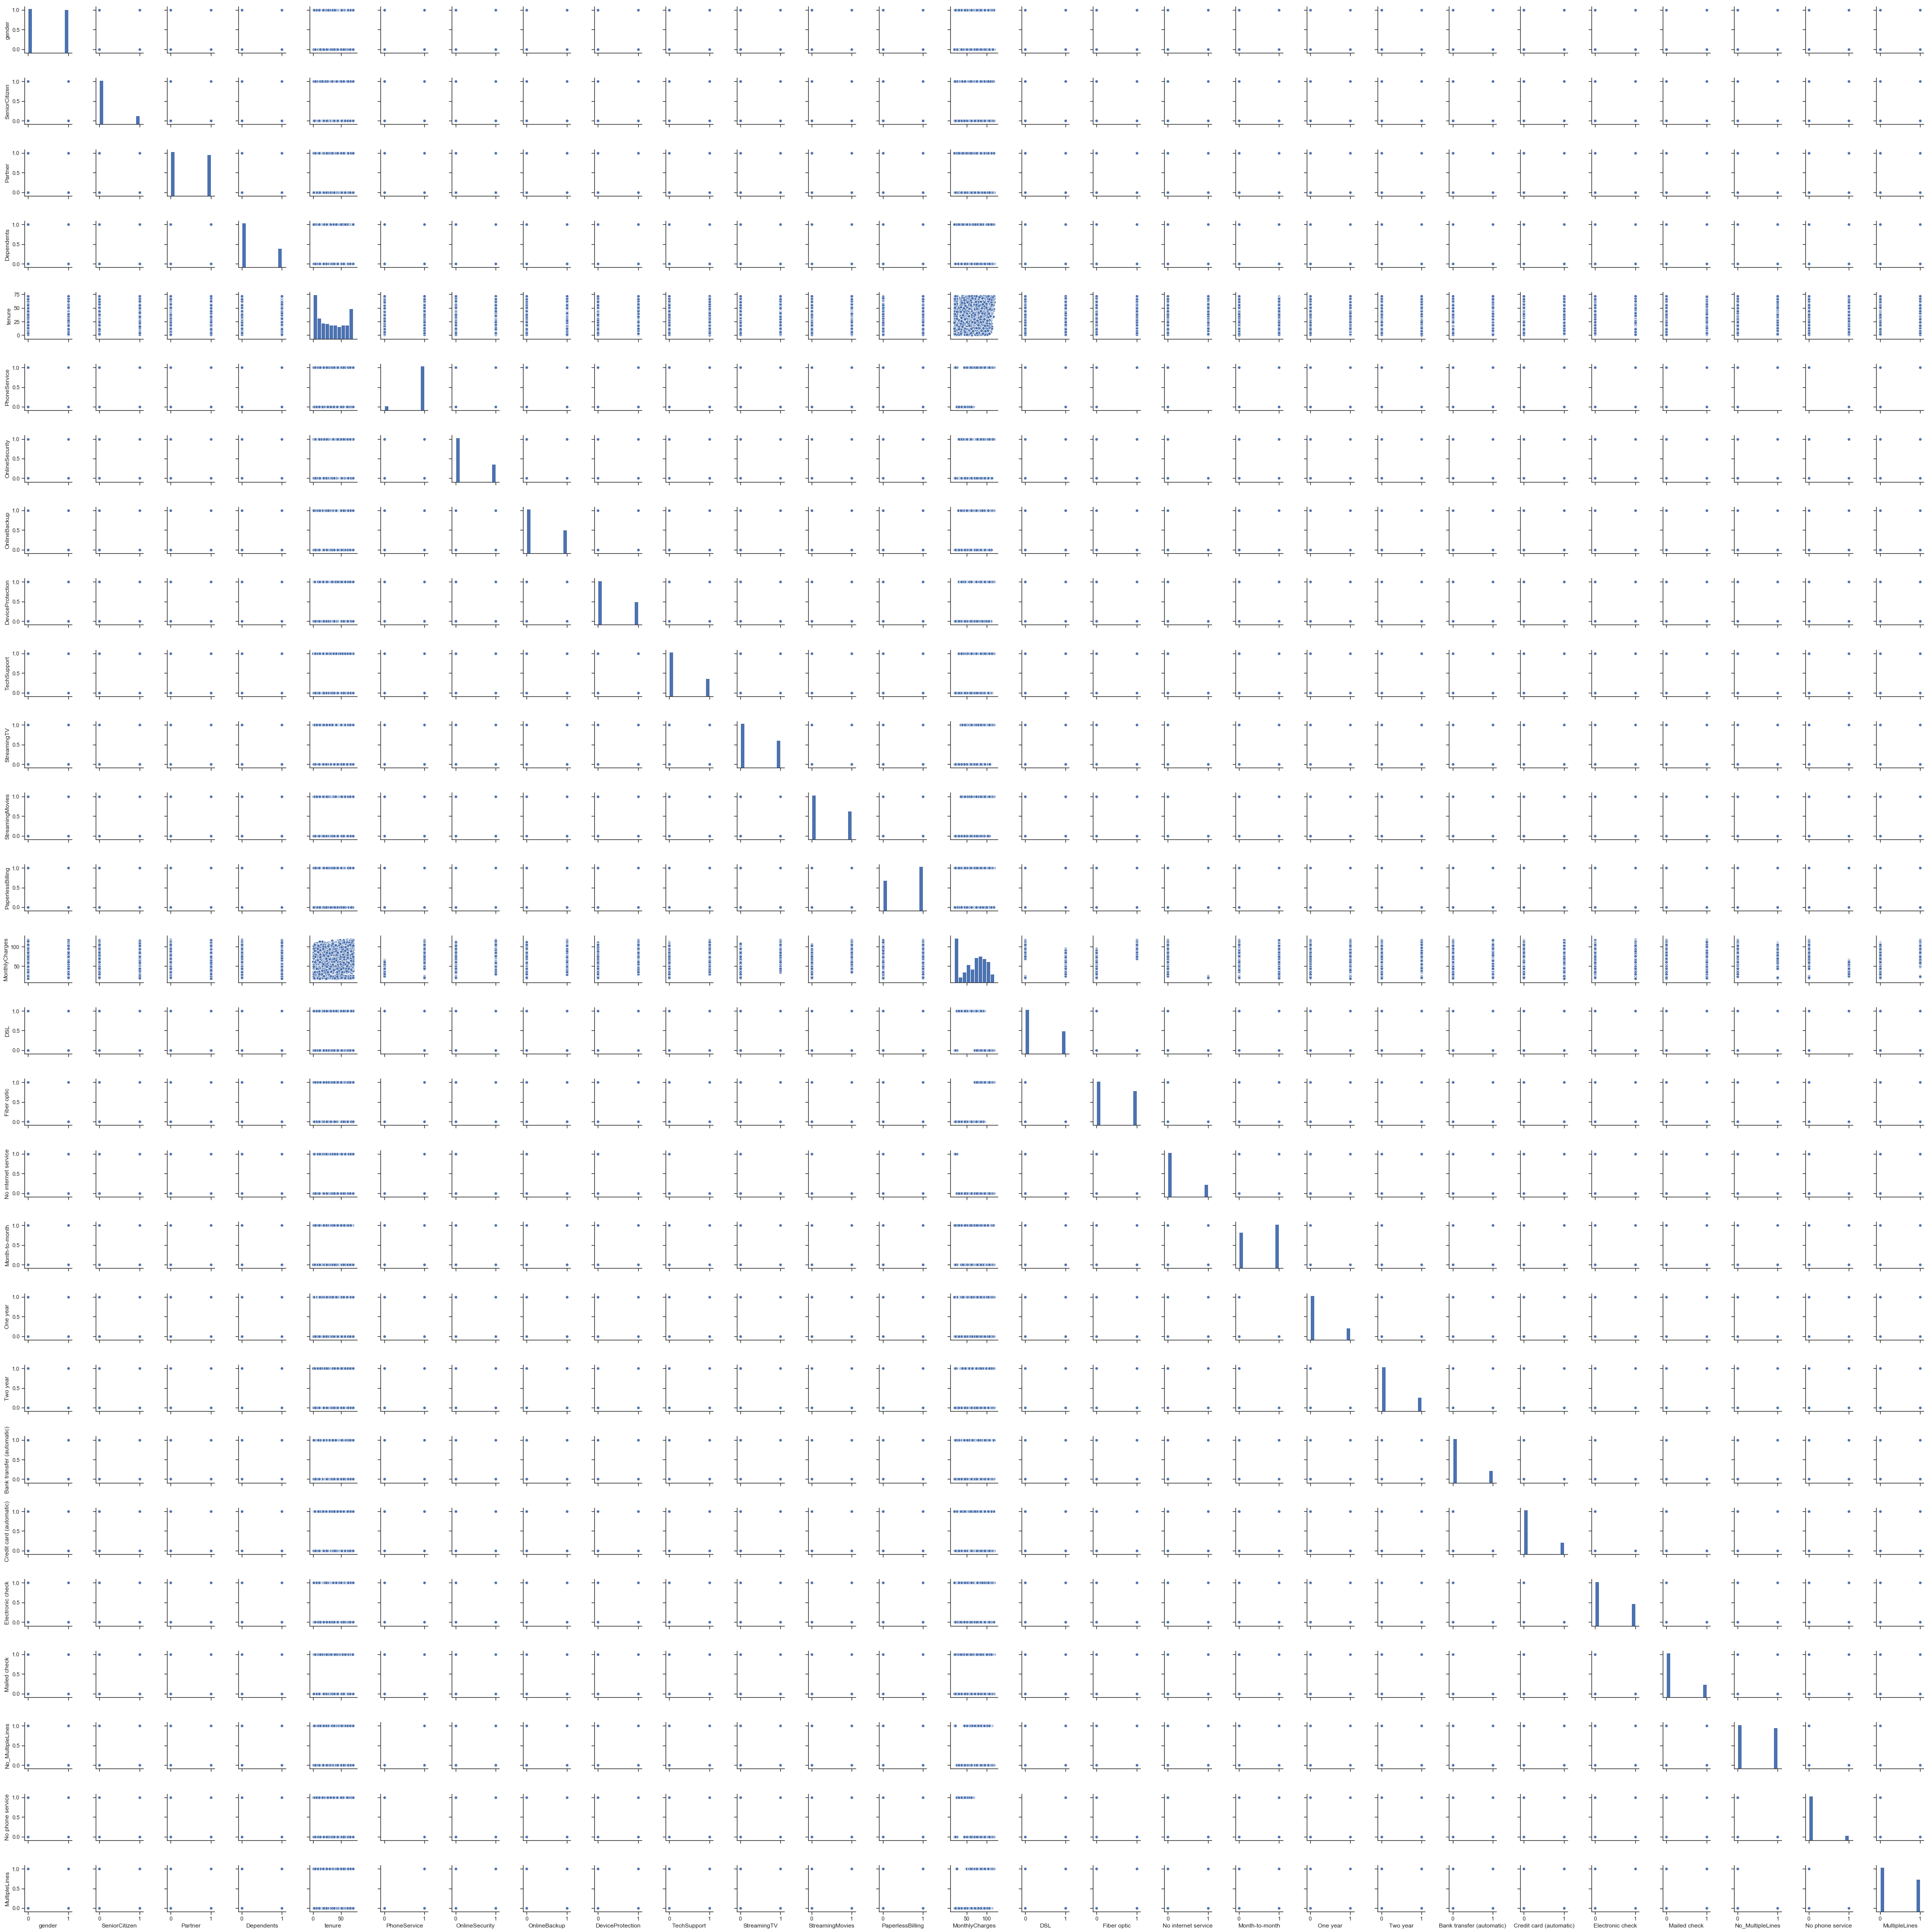

In [143]:
#sns.set_style("whitegrid");
sns.set(style="ticks",color_codes=True)
sns.pairplot(X, height=2)
plt.show()

- The dataset is way too big for understanding a heatmap.

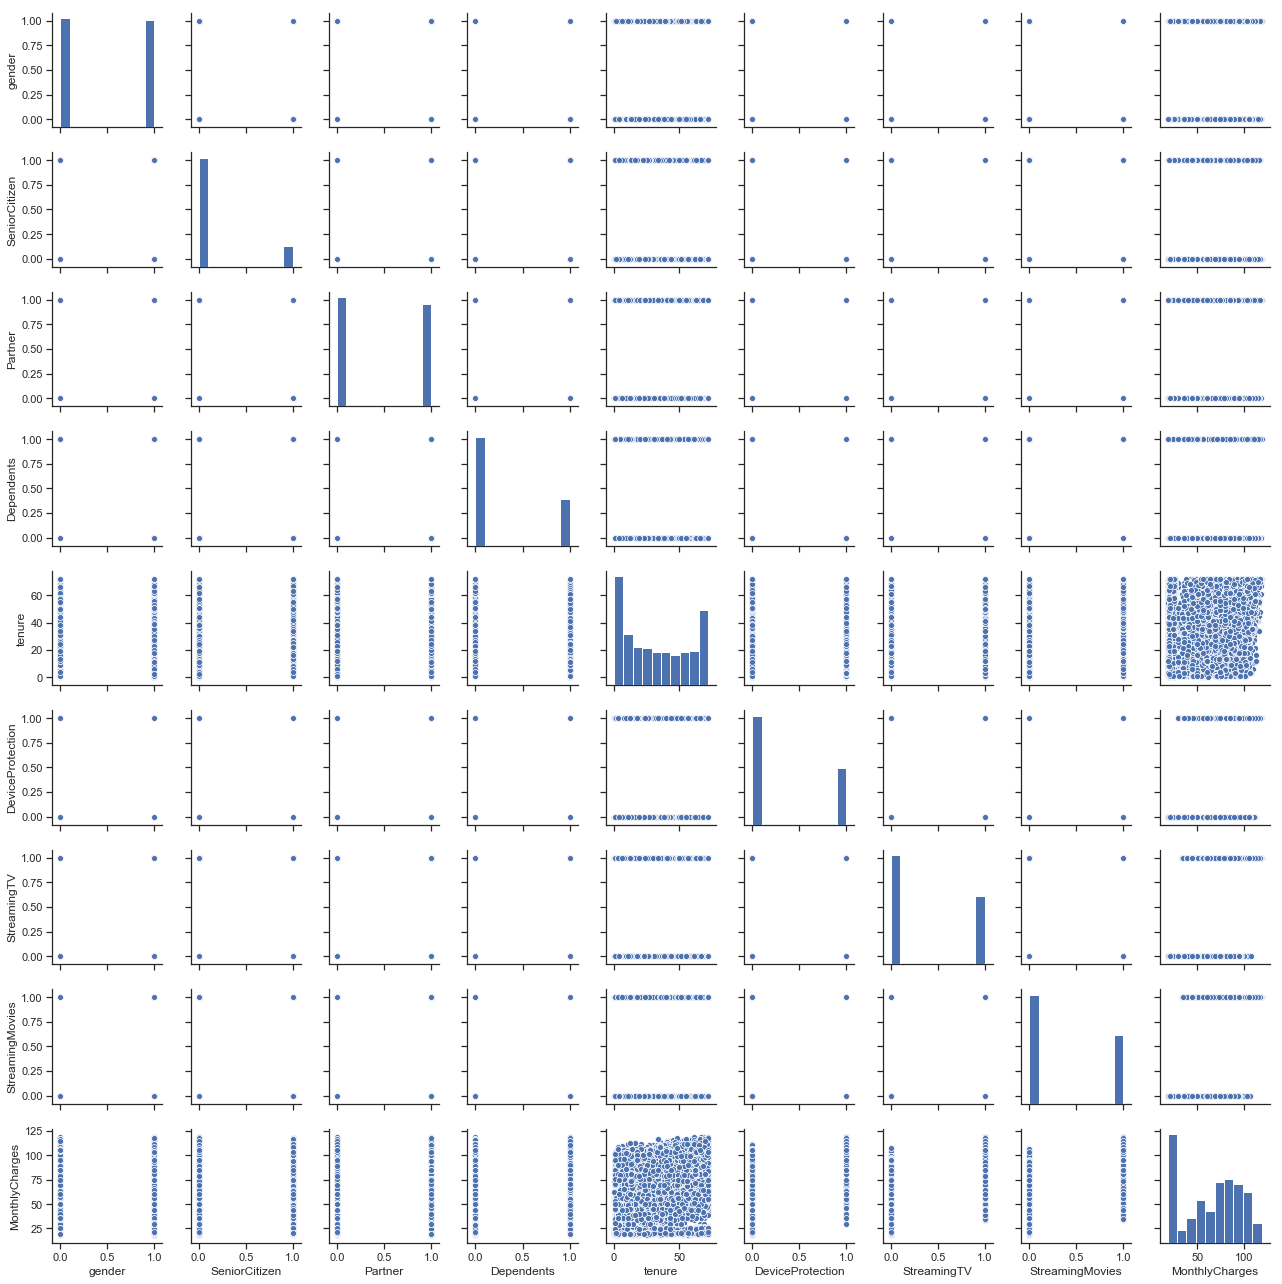

In [144]:

## Pairplot for dummy dataset.
sns.set(style="ticks",color_codes=True)
sns.pairplot(x, height=2)
plt.show()

#### Let's try Violin Plot

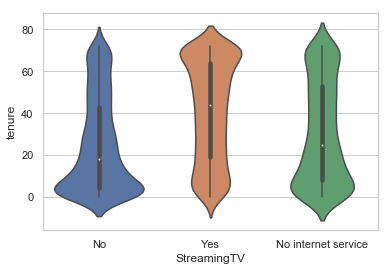

In [145]:
sns.set(style='whitegrid')
sns.violinplot(x='StreamingTV',y='tenure',data=data)

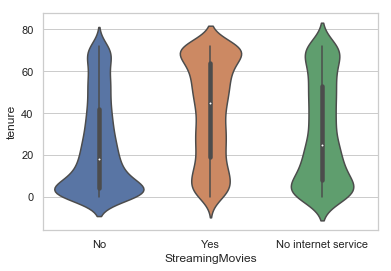

In [146]:
sns.set(style='whitegrid')
sns.violinplot(x='StreamingMovies',y='tenure',data=data)

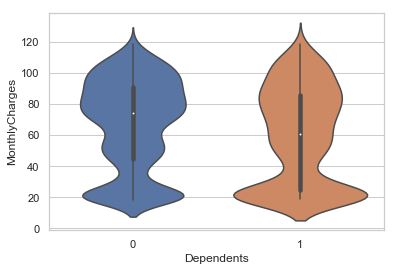

In [147]:
sns.set(style='whitegrid')
sns.violinplot(x='Dependents',y='MonthlyCharges',data=X)

### Normalizing the Dataset

In [148]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\aditya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 1.00955867, -0.43991649,  1.03453023, -0.65401193, -1.27744458,
        -3.05401039, -0.63393298,  1.3782406 , -0.72396752, -0.63943864,
        -0.79013171, -0.79607014,  0.8297975 , -1.16032292,  1.38171215,
        -0.88565976, -0.52592737,  0.90418382, -0.51424938, -0.56297505,
        -0.5298852 , -0.52504733,  1.40641839, -0.54480692, -0.96332984,
         3.05401039, -0.85417615],
       [-0.99053183, -0.43991649, -0.96662231, -0.65401193,  0.06632742,
         0.32743831,  1.57745383, -0.72556272,  1.38127743, -0.63943864,
        -0.79013171, -0.79607014, -1.20511329, -0.25962894,  1.38171215,
        -0.88565976, -0.52592737, -1.1059698 ,  1.94458183, -0.56297505,
        -0.5298852 , -0.52504733, -0.71102597,  1.83551265,  1.03806605,
        -0.32743831, -0.85417615],
       [-0.99053183, -0.43991649, -0.96662231, -0.65401193, -1.23672422,
         0.32743831,  1.57745383,  1.3782406 , -0.72396752, -0.63943864,
        -0.79013171, -0.79607014,  0.8297975 , -0.3626

### Train Test Split

In [149]:

train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=10)

In [150]:
print("Length of training dataset x : ",len(train_x))
print("Length of training dataset y : ",len(train_y))
print("Length of test dataset x : ",len(test_x))
print("Length of test dataset y : ",len(test_y))

Length of training dataset x :  5634
Length of training dataset y :  5634
Length of test dataset x :  1409
Length of test dataset y :  1409


##  3. Implementing Machine Learning Models

#### KNN MODEL:

In [151]:
k = 4
mod_Knn = KNeighborsClassifier(n_neighbors = k).fit(train_x,train_y)


In [152]:
print("Train set Accuracy: ", metrics.accuracy_score(train_y, mod_Knn.predict(train_x)))

Train set Accuracy:  0.8358182463613774


In [153]:
## Let's Examine on the test set

y_ = mod_Knn.predict(test_x)
print("Test set Accuracy: ", metrics.accuracy_score(test_y, y_))

Test set Accuracy:  0.7558552164655784


In [154]:
### Let's try to find out the best K-Value..
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    mod_Knn = KNeighborsClassifier(n_neighbors = n).fit(train_x,train_y)
    y_pred=mod_Knn.predict(test_x)
    mean_acc[n-1] = metrics.accuracy_score(test_y, y_pred)

    
    std_acc[n-1]=np.std(y_pred==test_y)/np.sqrt(y_pred.shape[0])

mean_acc


array([0.70617459, 0.76650106, 0.73669269, 0.75585522, 0.74946771,
       0.76011356, 0.76721079, 0.77217885, 0.76508162, 0.77430802,
       0.76721079, 0.77146913, 0.76721079, 0.7735983 , 0.77146913,
       0.76721079, 0.76792051, 0.77572747, 0.77288857])

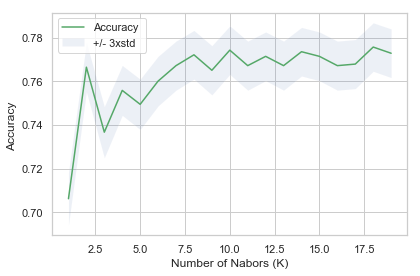

In [155]:
## Let's Visualize this Array.

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [156]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7757274662881476 with k= 18


In [157]:
## k=10 gives a quite good accuracy on test set.
## so as 18 but i would prefer k=10 more.

k = 10
mod_Knn = KNeighborsClassifier(n_neighbors = k).fit(train_x,train_y)
print("Train set Accuracy: ", metrics.accuracy_score(train_y, mod_Knn.predict(train_x)))
y_ = mod_Knn.predict(test_x)
print("Test set Accuracy: ", metrics.accuracy_score(test_y, y_))


Train set Accuracy:  0.8127440539581114
Test set Accuracy:  0.7743080198722498


### Decision Tree!!

In [158]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
tree.fit(train_x,train_y)
tree_ = tree.predict(test_x)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(test_y, tree_))

DecisionTrees's Accuracy:  0.7963094393186657


- Increased Accuracy on test set from KNN.

### Support Vector Machine!!!

In [159]:
mod_svm = svm.SVC()
mod_svm.fit(train_x, train_y)
pred_svm = mod_svm.predict(test_x)
print("Support Vector Machine Accuracy: ", metrics.accuracy_score(test_y,pred_svm))

C:\Users\aditya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Machine Accuracy:  0.7955997161107168


### Logistic Regression!!!

In [160]:
L= LogisticRegression(solver='newton-cg')
L.fit(train_x,train_y)
print("Training set Accuracy: ",L.score(train_x,train_y))
pred_logi=L.predict(test_x)
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(test_y, pred_logi))

Training set Accuracy:  0.8040468583599574
Logistic Regression's Accuracy:  0.8034066713981547


## 4. Model Evaluation and Conclusion

##### Classification Model generally evaluated on Few Evaluation Techniques:

- 1. **F1-Score** : The more the better.(Should be closer to one)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

- 2. **Jaccard Similarity Score** : 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html

- 3. **Log-Loss**(aka Cost Function) : The Less the better.(Closer to zero)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

In [161]:
print("Evaluation for KNN Model.")
print()
print("f1_score : ",f1_score(test_y, y_, average='weighted'))
print("jaccard_similarity_score : ",jaccard_similarity_score(test_y, y_))
print()

print("Evaluation for Decision Tree Model.")
print()
print("f1_score : ",f1_score(test_y, tree_, average='weighted'))
print("jaccard_similarity_score : ",jaccard_similarity_score(test_y, tree_))
print()

print('Evaluation for SVM Model.')
print()
print("f1_score: ",f1_score(test_y, pred_svm, average='weighted'))
print("jaccard_similarity_score : ",jaccard_similarity_score(test_y, pred_svm))
print()
print('Evaluation for Logistic Regression')
print()
print("f1_score: ",f1_score(test_y, pred_logi, average='weighted'))
print("jaccard_similarity_score : ",jaccard_similarity_score(test_y, pred_logi))
logloss = L.predict_proba(test_x)
print("Logistic Regression LogLoss: " ,log_loss(test_y, logloss))

Evaluation for KNN Model.

f1_score :  0.7668745532493352
jaccard_similarity_score :  0.7743080198722498

Evaluation for Decision Tree Model.

f1_score :  0.7886624792801283
jaccard_similarity_score :  0.7963094393186657

Evaluation for SVM Model.

f1_score:  0.7869539962692216
jaccard_similarity_score :  0.7955997161107168

Evaluation for Logistic Regression

f1_score:  0.7987765138696962
jaccard_similarity_score :  0.8034066713981547
Logistic Regression LogLoss:  0.40698265595441246


### Final Conclusions

### Model Report:

| Algorithm          | F1-score| Jaccard  | LogLoss |
|--------------------|---------|----------|---------|
| KNN                |0.7668745|0.77430801| NA      |
| Decision Tree      |0.7886624|0.79630943| NA      |
| SVM                |0.7869539|0.79559971| NA      |
| LogisticRegression |0.7987765|0.80340667|0.4069826|

- The Best Performimg Algorithm is Logistic Regression, Although the accuracy is expected to drop on test data. 